#Load data to Colab

###Connect to GDrive to the path where dataset is stored

In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive/", force_remount=True)

mypath = "drive/MyDrive/"
os.listdir(mypath)

Mounted at /content/drive/


['Colab Notebooks',
 '.ipynb_checkpoints',
 'CS598DLHProject',
 'original_paper_data',
 'copy',
 'CS410Project']

## Initialize relevant data URIs

In [ ]:
DATA_DIR = mypath + "CS410Project/Datasets/"

STOCK_DATA_CSV_ZIP = "stock_data.csv"

##Import dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Read CSV data

In [ ]:
data=pd.read_csv(DATA_DIR + STOCK_DATA_CSV_ZIP)
data.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [ ]:
data.describe()

,Sentiment
count,5791.000000
mean,0.272664
std,0.962192
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


##Checking for null data

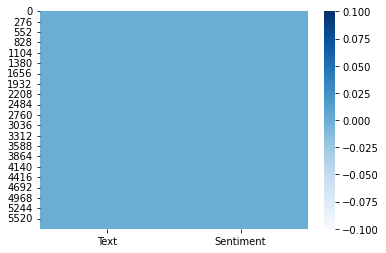

In [ ]:
sns.heatmap(data.isnull(),cmap='Blues')

In [ ]:
data['Sentiment'].value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

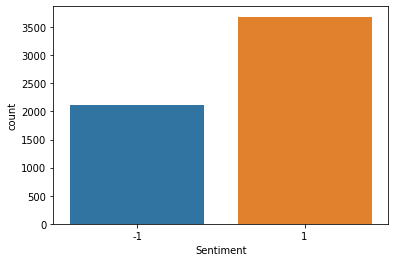

In [ ]:
sns.countplot(x=data['Sentiment'])

In [ ]:
data.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
-1         2106   2106  AAP - user if so then the current downtrend wi...    1
 1         3685   3685  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...    1

## Create new field 'Length' which has the length of the tweet


In [ ]:
data['Length']=data['Text'].apply(lambda x:len(x))

##Data binning to figure out distribution of tweet lengths

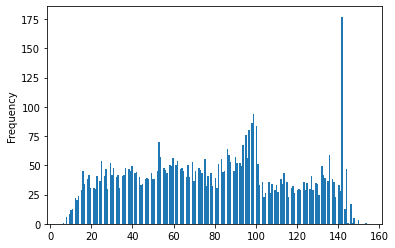

In [ ]:
data['Length'].plot.hist(bins=200)

In [ ]:
data['Length'].describe()


count    5791.000000
mean       78.507857
std        37.409135
min         6.000000
25%        48.000000
50%        79.000000
75%       106.000000
max       154.000000
Name: Length, dtype: float64

## Data binning by sentiments (Positive/Negative)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f95b186c950>,
      dtype=object)

<Figure size 864x360 with 0 Axes>

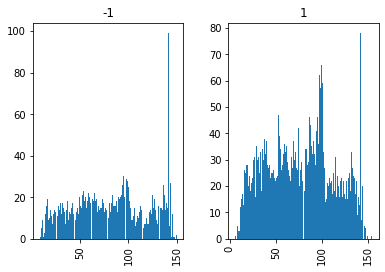

In [ ]:
plt.figure(figsize=(12,5))
data.hist(column='Length',by='Sentiment',bins=150)

## Import Stopwords corpus for cleaning tweets

In [ ]:
import string
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean(text):
    a=[f for f in text if f not in string.punctuation]
    a=''.join(a)
    b=[w for w in a.split() if w.lower() not in stopwords.words('english')]
    return b

In [ ]:
# Test clean function on 1 tweet
check=data['Text'].head(1).apply(clean)


In [ ]:
# Test
print(check[0])

['Kickers', 'watchlist', 'XIDE', 'TIT', 'SOQ', 'PNK', 'CPW', 'BPZ', 'AJ', 'trade', 'method', '1', 'method', '2', 'see', 'prev', 'posts']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier





In [ ]:
# # Cleaning all our data set from punctuations and stopwords
words=CountVectorizer(analyzer=clean).fit(data['Text'])


In [ ]:
print(len(words.vocabulary_))


13456


In [ ]:
# # Test Block
# sample=data['Text'][1]
# sample

In [ ]:
# # Test Block

# trans=words.transform([sample])

# # L.H.S shows the position of a particular word and R.H.S tell the count of that word
# print(trans)

In [ ]:
# # Test Block
# print(trans.shape)
# # We have 1 document with total different words in total

In [ ]:
# # Test Block
# # Printing the particular word with the help of index.
# words.get_feature_names()[363]


# Testing

# Perform Count Vectorization on data (Tokenization)

In [ ]:
# tweets=words.transform(data['Text'])


In [ ]:
# print(tweets.shape)
# # Total documents vs total different words

In [ ]:
# # No of non - zero's value
# tweets.nnz


## Create TD-IDF transformer

In [ ]:

# tf=TfidfTransformer()
#def fit_tfifd(data):
  #tf_vect = TfidfVectorizer(prepressor=lambda x:x, tokenizer = lambda x:x)
  #tf_vect.fit(data)
  #return tf_vect
#print(data)



In [ ]:
# tf.fit(tweets)


In [ ]:
# # Test Block

# tfidf=tf.transform(trans)
# print(tfidf) 


In [ ]:
# # Test Block

# tf.idf_[words.vocabulary_['return']]


In [ ]:
# # Checking the IDF value of particular word how imp a term is in whole dataset 
# final_transform=tf.transform(tweets)

In [ ]:

# modelfitting=MultinomialNB().fit(final_transform,data['Sentiment'])


In [ ]:
# result=modelfitting.predict(final_transform)

In [ ]:
# print(result)


# Approach

Split data into train, test

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data['Text'],data['Sentiment'],test_size=0.3,random_state=101)


Count vectorization

In [ ]:
cv = CountVectorizer(analyzer=clean)

In [ ]:
words = cv.fit(x_train)

In [ ]:
tweets=words.transform(x_train)
print(tweets.shape)

(4053, 10730)


TFIDF transformer

In [ ]:
tf=TfidfTransformer()
tf.fit(tweets)

TfidfTransformer()

In [ ]:
final_transform=tf.transform(tweets)

Classifier on input

Multinomial Naive Bayes Classifier

In [ ]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()

# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier()

# from sklearn.svm import SVC
# classifier = SVC()

# from sklearn.naive_bayes import MultinomialNB
# classifier = MultinomialNB()

# from sklearn.linear_model import SGDClassifier
# classifier = SGDClassifier()

# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier()

# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier()

# from sklearn.ensemble import GradientBoostingClassifier
# classifier = GradientBoostingClassifier()

from xgboost.sklearn import XGBClassifier
classifier = XGBClassifier()


In [ ]:
modelfitting=classifier.fit(final_transform,y_train)

Prediction on Test data

In [ ]:
# Count Vectorization of X_test
tweets_test = words.transform(x_test)
print(tweets_test.shape)

# TFIDF Vectorization
final_transform_test = tf.transform(tweets_test)
print(final_transform_test.shape)

# Classifier predict
y_predict = modelfitting.predict(final_transform_test)
print(y_predict.shape)



(1738, 10730)
(1738, 10730)
(1738,)


In [ ]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

          -1       0.38      0.72      0.50       333
           1       0.92      0.72      0.81      1405

    accuracy                           0.72      1738
   macro avg       0.65      0.72      0.65      1738
weighted avg       0.81      0.72      0.75      1738



In [ ]:
print(confusion_matrix(y_predict,y_test))


[[379 252]
 [256 851]]


In [ ]:
print(accuracy_score(y_predict,y_test))


0.716915995397008


# Other section

Using Pipelining of steps

In [ ]:
# pipe=Pipeline([
#  ('cv',CountVectorizer(analyzer=clean)),
#  ('tfidf',TfidfTransformer()),
#  ('Classifier',MultinomialNB())
# ])

In [ ]:
# x_train,x_test,y_train,y_test=train_test_split(data['Text'],data['Sentiment'],test_size=0.3,random_state=101)


In [ ]:
# pipe.fit(x_train,y_train)

In [ ]:
# pipe_predict=pipe.predict(x_test)


In [ ]:
# print(classification_report(pipe_predict,y_test))


In [ ]:
# print(confusion_matrix(pipe_predict,y_test))


In [ ]:
# print(accuracy_score(pipe_predict,y_test))
